0
Vehcile  0  is sleeping
thread started
Vehcile  1  is sleeping
Vehcile  2  is sleeping
Vehcile  3  is sleeping


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[['N' 'Y(M)']
 ['N' 'N']
 ['N' 'N']
 ['N' 'N']
 ['N' 'N']
 ['N' 'N']
 ['N' 'N']
 ['N' 'N']
 ['N' 'N']
 ['N' 'N']
 ['N' 'Y(M)']
 ['N' 'Y(M)']
 ['N' 'Y(S)']
 ['N' 'Y(M)']
 ['N' 'Y(M)']
 ['N' 'Y(M)']
 ['N' 'Y(M)']
 ['N' 'Y(M)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)']
 ['N' 'Y(S)

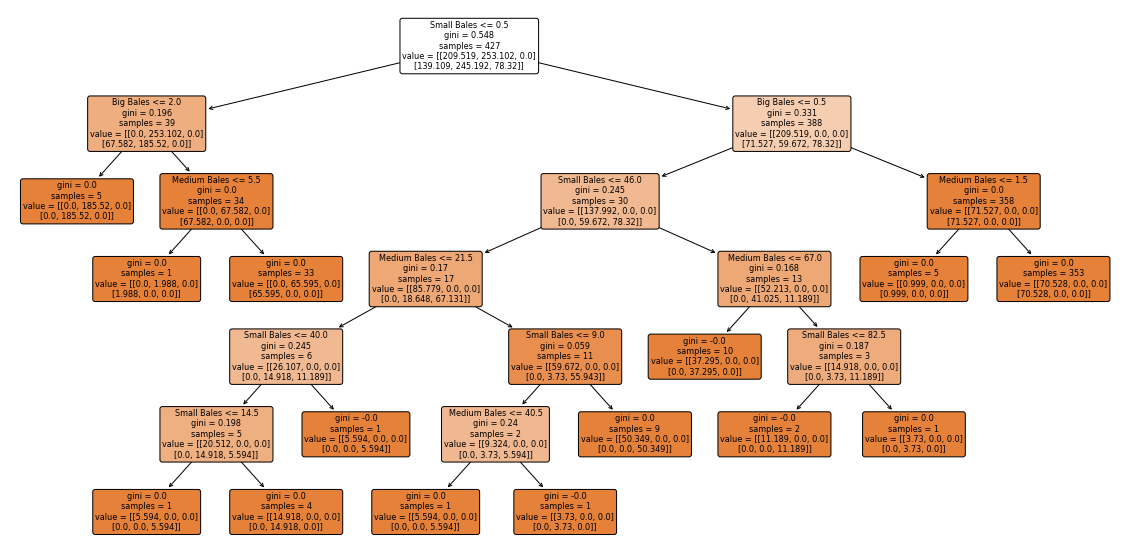

In [3]:
import sklearn as sk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import datasets
import time
import threading

################# ML Imports ######################
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#######################################################################################################

actualVehNature = ["SV",  #vehicle 1 Model
                   "MV",  #vehicle 2 Model
                   "LV",  #vehicle 3 Model
                   "WV"]  #vehcile 4 Model
changedVehNature = actualVehNature
maxcap = [3, #vehicle 1 capacity
          2, #vehicle 2 capacity
          1, #vehicle 3 capacity
          1] #vehcile 4 capacity
vehStartPoint = [[0,0],  #vehicle 1 Starting point
                 [0,0],  #vehicle 2 Starting point
                 [0,0],  #vehicle 3 Starting point
                 [0,0]]  #vehcile 4 Starting point

balesColPoint = [[5,13],  #Small bales Collecting point
                 [5,13],  #Medium bales Collecting point
                 [5,13],  #Big bales Collecting point
                 [5,13]]  #Weed bales Collecting point

################## ML Code ################################
######### Training #################
# def mlalgotrain():
input_dir = 'C:/Users/vigne/Mechatronics_ML/'
df_train = pd.read_csv(input_dir + 'Book1.csv')

var_columns = [c for c in df_train.columns if c  in ['Small Bales','Medium Bales', 'Big Bales']]
var_ycolumns = [c for c in df_train.columns if c  in ['SV prior','LV Prior']]
X = df_train.loc[:,var_columns]
Y = df_train.loc[:,var_ycolumns]

model_tree = DecisionTreeClassifier(max_leaf_nodes=20, class_weight='balanced')
model_tree.fit(X, Y)

#Create the figure
plt.figure(figsize=(20,10))

#Create the tree plot
plot_tree(model_tree,
           feature_names = var_columns, #Feature names
           class_names = ["0","1"], #Class names
           rounded = True,
           filled = True)

# plt.show()

########## Training End ##############

########## Prediction start ############
def mlalgopredict():
#     df_test = pd.read_csv('C:/Users/vigne/Mechatronics_ML/' + 'testme.csv')
    df = pd.read_csv('balesdata.csv')
    
    df.loc['0', 'Small Bales']  = noofBales[0] # updating the Small bales number to the worksheet
    df.loc['0', 'Medium Bales'] = noofBales[1] # updating the mid bales number to the worksheet
    df.loc['0', 'Big Bales']    = noofBales[2] # updating the big bales number to the worksheet
    df.loc['0', 'Weed Bales']   = noofBales[3] # updating the weed bales number to the worksheet
    
    df.to_csv('balesdata.csv')
    
    var_columnstest = [c for c in df.columns if c  in ['Small Bales','Medium Bales', 'Big Bales']]
#     print('The column test is')
#     print(var_columnstest)
    Xtest = df.loc[:,var_columnstest]
#     print(Xtest)
#     print(df_test)

    Ytest = model_tree.predict(Xtest)
    print(Ytest)
########### Prediction End ############

################# ML Code End #############################

##############Loading the file###########################
fieldarray = []
# def loadfield():
with open("field.txt") as file_name:
        fieldarray = np.loadtxt(file_name, delimiter=" ")
        # print(fieldarray)
#########################################################

# wn = turtle.Screen()
# wn.title("Precise Farming")
# wn.bgcolor("green")
# wn.setup(width=800, height=600)
# wn.tracer(0)

#############Counting the Bales#########################
noofBales = []
noofBales.append(np.count_nonzero(fieldarray == 1))  #noofSmallB
noofBales.append(np.count_nonzero(fieldarray == 2))  #noofMidB
noofBales.append(np.count_nonzero(fieldarray == 3))  #noofBigB
noofBales.append(np.count_nonzero(fieldarray == 4))  #noofWeedB
    # noofBales.append(np.count_nonzero(array == 5))     #noofObst
    #print(noofBales)
########################################################
    
#############Row & Col calculate########################
fieldrow = len(fieldarray)
fieldcol = len(fieldarray[0])
fieldrowwithedge = fieldrow*2+1
fieldcolwithedge = fieldcol*2+1
    # print(fieldrowwithedge,fieldcolwithedge)
########################################################

#############Drafting field with edges##################
fieldarraywithedge = np.zeros([fieldrowwithedge,fieldcolwithedge], dtype=int)
fieldarraywithedge = np.full_like(fieldarraywithedge, 9)
    # print(fieldarraywithedge)
#######################################################


def update():
    with open("field.txt") as file_name:
        fieldarray = np.loadtxt(file_name, delimiter=" ")
        # print(fieldarray)
        
    noofBales.append(np.count_nonzero(fieldarray == 1))  #noofSmallB
    noofBales.append(np.count_nonzero(fieldarray == 2))  #noofMidB
    noofBales.append(np.count_nonzero(fieldarray == 3))  #noofBigB
    noofBales.append(np.count_nonzero(fieldarray == 4))  #noofWeedB

def maxpriorityBale():    
    baleId = noofBales.index(max(noofBales))
    return baleId
#     print("The Max Priority Bale Type ID is ",baleId)

def addedges():
    m = 1
    for i in range(fieldrow):
        n = 1
        for j in range(fieldcol):
            fieldarraywithedge[m][n] = fieldarray[i][j]
            n+=2
        m+=2
    for i in range(1,fieldrowwithedge,2):
        for j in range(1,fieldcolwithedge,2):
            if fieldarraywithedge[i][j]==5:
                for m in range(i-1,i+2,1):
                    for n in range(j-1,j+2,1):
                        if fieldarraywithedge[m][n]==5:
                            continue
                        else:
                            fieldarraywithedge[m][n]=8
            else:
                continue
#     print(fieldarraywithedge)
    
def removeedges():
    m = 1
    for i in range(fieldrow):
        n = 1
        for j in range(fieldcol):
            fieldarray[i][j] = fieldarraywithedge[m][n]
            n+=2
        m+=2
    print(fieldarray) 

def dist(x1,y1,x2,y2):
    return ((x2-x1)**2 + (y2-y1)**2)**0.5

def baleColOrder(vehicNo,baletype,iteration):
        baleColOrder = []
        baleColOrder.append(vehStartPoint[vehicNo])
#         print(index)
        for iter in range(iteration):
            index = (np.argwhere(fieldarraywithedge == baletype))
            x1,y1 = vehStartPoint[vehicNo]           
            for i in range((len(index))):
                x2,y2 = index[i]
                distgap = dist(x1,y1,x2,y2)
                if i==0:
                    finaldistgap = distgap
                    finaldistgapindex = i
                else:
                    if distgap < finaldistgap:
                        finaldistgap = distgap
                        finaldistgapindex = i
                    else:
                        continue
            row = index[finaldistgapindex][0]
            col = index[finaldistgapindex][1]
#             print("The decuted is ",row,col)
            fieldarraywithedge[row][col] = 0            
            vehStartPoint[vehicNo] = index[finaldistgapindex]
            baleColOrder.append(vehStartPoint[vehicNo])
        
        return baleColOrder
        
        
##########Update Vehicle Nature based on priority#########
def updateVehicleNature(pribale):
    for i in range(len(actualVehNature)):
        if actualVehNature[i]=="SV":
            if noofBales[0]>3:
                continue     #since no of mid bale is greater than 2, let the MV continue to be MV
            elif((noofBales[0]==0)and(pribale==1)and(noofBales[1]>0)):
                changedVehNature[i] = "MV"
                maxcap[i] = 1;
            else:
                continue
        elif actualVehNature[i]=="LV":
            if noofBales[2]>1:
                continue     #since no of BIg bale is still 1 remaining, let the LV continue to be LV
            elif ((noofBales[2]==0)and(pribale==0)and(noofBales[0]>0)):
                changedVehNature[i] = "SV"
                maxcap[i] = 2;
            elif ((noofBales[2]==0)and(pribale==1)and(noofBales[1]>0)):
                changedVehNature[i] = "MV"
                maxcap[i] = 1;
            else:
                continue
        else:
            continue
#     print(noofBales)
#     print(changedVehNature)
##########################################################

def startveh(vehicleNo):
    Nature = changedVehNature[vehicleNo]
    vehicleCap = maxcap[vehicleNo]

    if Nature=="SV":
        baleType = 1
    elif Nature=="MV":
        baleType = 2
    elif Nature=="LV":
        baleType = 3
    elif Nature=="WV":
        baleType = 4
    else:
        print("Nothing")
    
    if noofBales[baleType-1]>0:
        print("Vehcile ",vehicleNo," strated moving")
        TravellingNodeOrder = baleColOrder(vehicleNo,baleType,vehicleCap)
        TravellingNodeOrder.append(balesColPoint[vehicleNo])
        print(TravellingNodeOrder)
        
        for i in range(len(TravellingNodeOrder)-1):
            startnode = TravellingNodeOrder[i]
            endnode = TravellingNodeOrder[i+1]
            
            if(((startnode[0]-1<=endnode[0])and(endnode[0]<=startnode[0]+1))and((startnode[1]-1<=endnode[1])and(endnode[1]<=startnode[1]+1))):
                print("\nMove not required,picked the bale")
                continue
            else:
                print("\nMoving")
    else:
        print("Vehcile ",vehicleNo," is sleeping")
###############Creating Threads###########################
# Create two threads as follows
try:
#    server = myThread(1, "server", 1)
    vehicle0 = threading.Thread(target=startveh,args=(0,))
    vehicle1 = threading.Thread(target=startveh,args=(1,))
    vehicle2 = threading.Thread(target=startveh,args=(2,))
    vehicle3 = threading.Thread(target=startveh,args=(3,))
except:
    print("Error: unable to start thread")
##########################################################



def main():
#     loadfield()
#     countbales()
#     calcRowCol()
#     draftEdges()

#     mlalgotrain()
    update()
    
#     while sum(noofBales)>0:
    print(sum(noofBales))
    addedges()
    ######Manual priroity#######
    priorBale = maxpriorityBale()
    updateVehicleNature(priorBale)
    
    #     wn.update()
    ############################
    #     time.sleep(10)    
    vehicle0.start()
    print('thread started')
    vehicle1.start()
    vehicle2.start()
    vehicle3.start()
    
    print("\n")
    removeedges()
    
    vehicle0.join()
    vehicle1.join()
    vehicle2.join()
    vehicle3.join()
    
    np.savetxt('field.txt', fieldarray, delimiter=" ",fmt='%d')
    
    mlalgopredict()
    
    update()

    
    
if __name__ == '__main__':
    main()

In [2]:
# field = pd.read_csv("field.txt", sep=" ", header=None)
# field.describe()

In [5]:
# edge = 1;
# Purchasedvehicle = {S,M,B,W};

# half edge = 0.5;

In [5]:
# array.describe()